In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PathToLocal = "heart_2020_cleaned.csv"
PathToKaggle = "/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv"

Path = PathToLocal if os.path.exists(PathToLocal) else PathToKaggle

In [3]:
data = pd.read_csv(Path)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
data.Sex = data.Sex.map(
    {
        'Male': 1,
        'Female': 0
    }
)

In [5]:
data.AgeCategory = data.AgeCategory.map(
    {
        '18-24': 1,
        '40-44': 2,
        '45-49': 3,
        '50-54': 4,
        '55-59': 5,
        '60-64': 6,
        '65-69': 7,
        '70-74': 8,
        '75-79': 9,
        '80 or older': 10,
    }
)

In [6]:
data = pd.get_dummies(data, columns=['Race'])

In [7]:
data.Diabetic = data.Diabetic.map(
    {
        'Yes': 1,
        'Yes (during pregnancy)': 1,
        'No': 0,
        'No, borderline diabetes': 0,
    }
)

In [8]:
data.GenHealth = data.GenHealth.map(
    {
        'Excellent': 5,
        'Very good': 4,
        'Good': 3,
        'Fair': 2,
        'Poor': 1,
    }
)

In [9]:
data.HeartDisease = data.HeartDisease.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [10]:
data.Smoking = data.Smoking.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [11]:
data.AlcoholDrinking = data.AlcoholDrinking.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [12]:
data.Stroke = data.Stroke.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [13]:
data.DiffWalking = data.DiffWalking.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [14]:
data.PhysicalActivity = data.PhysicalActivity.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [15]:
data.Asthma = data.Asthma.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [16]:
data.KidneyDisease = data.KidneyDisease.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [17]:
data.SkinCancer = data.SkinCancer.map(
    {
        'Yes': 1,
        'No': 0,
    }
)

In [18]:
data.isnull().sum()

HeartDisease                               0
BMI                                        0
Smoking                                    0
AlcoholDrinking                            0
Stroke                                     0
PhysicalHealth                             0
MentalHealth                               0
DiffWalking                                0
Sex                                        0
AgeCategory                            56258
Diabetic                                   0
PhysicalActivity                           0
GenHealth                                  0
SleepTime                                  0
Asthma                                     0
KidneyDisease                              0
SkinCancer                                 0
Race_American Indian/Alaskan Native        0
Race_Asian                                 0
Race_Black                                 0
Race_Hispanic                              0
Race_Other                                 0
Race_White

In [19]:
data = data.astype(np.float32)

In [20]:
data.dropna(inplace=True)

In [21]:
y = data['HeartDisease']

In [22]:
data = data.drop(columns=['HeartDisease'])

In [23]:
data = np.array(data)
data

array([[16.6 ,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [26.58,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [27.41,  1.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [24.24,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [46.56,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [24]:
def preprocess(Data):
    return np.array(Data) - np.mean(np.array(Data), axis=0)

In [25]:
def manual_covariance_matrix(data):
    X_mean = np.mean(data, axis=0)
    x_centered = (data - X_mean)
    num_samples = data.shape[0]
    num_features = data.shape[1]

    covarianceMatrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(num_features):
            covarianceMatrix[i, j] = np.sum((data[:, i] - X_mean[i]) * (data[:, j] - X_mean[j])) / (num_samples - 1)

    return covarianceMatrix, x_centered

In [26]:
X_centered = preprocess(data)

In [27]:
covariance_matrix = np.dot(X_centered.T, X_centered) / len(X_centered)

In [28]:
covariance_matrix

array([[ 3.91229315e+01,  6.14774065e-02, -6.21108417e-02,
         2.65824698e-02,  5.93739020e+00,  2.86719844e+00,
         4.53940588e-01,  1.19909848e-01, -7.84786090e-01,
         4.88004916e-01, -4.29188163e-01, -1.49787305e+00,
        -4.34565343e-01,  1.96747323e-01,  7.13040887e-02,
        -7.25992475e-02,  1.88008023e-02, -6.84356955e-02,
         1.28636749e-01,  3.59331103e-02,  1.17393244e-02,
        -1.26674056e-01],
       [ 6.14774065e-02,  2.43754568e-01,  1.26643485e-02,
         6.39622739e-03,  4.78442365e-01,  2.98166031e-01,
         2.21492762e-02,  2.08815148e-02,  1.55723123e-01,
         1.00107282e-02, -2.13078328e-02, -9.19322998e-02,
        -1.49331711e-02,  3.48832812e-03,  3.45554098e-03,
         4.93978053e-03,  2.06098318e-03, -3.90470940e-03,
        -3.96917663e-03, -7.99242074e-03,  1.20617127e-03,
         1.25991327e-02],
       [-6.21108417e-02,  1.26643485e-02,  5.96942055e-02,
        -9.87029197e-04, -3.55791107e-02,  7.68413804e-02,
    

In [29]:
X_centered.shape

(263537, 22)

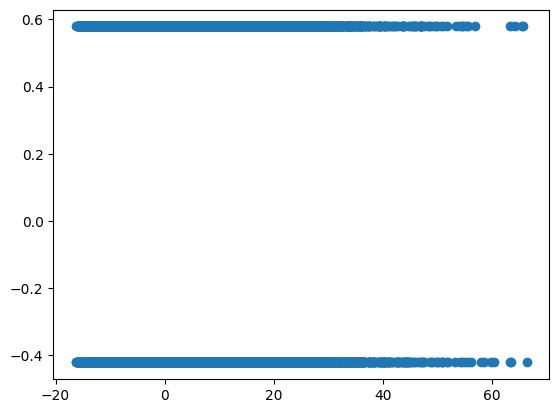

In [30]:
plt.scatter(X_centered[:, 0], X_centered[:, 1])

In [31]:
def calculate_eigenvalues_and_eigenvectors(A, tol=1e-10, max_iter=1000000):
    if A.ndim != 2 or A.shape[0] != A.shape[1]: raise ValueError("Matrix A must be square.")
    lambdaMax = 0
    # Initialize random vector
    v = np.ones(A.shape[0])
    for _ in range(max_iter):
        # Update vector
        v = A @ v
        # Normalize
        v_norm = np.linalg.norm(v)
        v /= v_norm
        # Calculate eigenvalue
        lambda_new = np.dot(A @ v, v)
        # Check convergence
        if abs(lambda_new - lambdaMax) < tol: break
        # Update dominant eigenvalue
        lambdaMax = lambda_new
    return lambdaMax, v

In [32]:
def calculate_eigenvalues_and_eigenvectors2(covariance_matrix):
    # Step 3: Compute eigenvalues
    eigenvalues = np.linalg.eigvalsh(covariance_matrix)

    # Step 4: Compute eigenvectors for each eigenvalue
    eigenvectors = []
    for eigenvalue in eigenvalues:
        # Solve the system of equations (C - λI)u = 0
        system_matrix = covariance_matrix - eigenvalue * np.eye(covariance_matrix.shape[0])
    
        # Compute the null space using SVD
        _, _, v = np.linalg.svd(system_matrix)
        null_space_basis = v.T[:, -1]  # Use the last column of v as the null space basis
    
        eigenvectors.append(null_space_basis)
    return eigenvectors

In [33]:
lambda_max, v_max = calculate_eigenvalues_and_eigenvectors(covariance_matrix)

print(f"eigenvalue: {lambda_max}")
print(f"eigenvector: {v_max}")

eigenvalue: 86.26289613882635
eigenvector: [ 1.37432524e-01  6.59487330e-03  1.22900086e-04  2.78802755e-03
  7.76387522e-01  6.11738062e-01  1.62218707e-02 -3.88833123e-03
 -7.15352702e-03  5.73371645e-03 -1.11574425e-02 -5.70031339e-02
 -1.68046075e-02  5.48590768e-03  2.80573790e-03  1.69244569e-04
  4.12208536e-04 -6.06544577e-04  7.05127062e-04  3.65984902e-04
  5.29360702e-04 -1.40613675e-03]


In [34]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues.max()

86.26289613887396

In [35]:
eigenvectors[eigenvalues.argmax()]

array([ 1.37432232e-01,  1.95185287e-01, -9.70041509e-01,  2.54975443e-02,
       -9.14468795e-03, -3.30725682e-02,  1.68259324e-04,  2.38145473e-03,
        3.84306323e-03,  8.16537135e-03,  9.99375009e-03, -6.25683264e-04,
        2.87138334e-03,  8.17711885e-04,  1.54167536e-03, -6.11001029e-04,
        7.73837206e-04,  1.87193965e-03, -1.55575892e-03,  1.13918523e-03,
       -3.42636452e-04, -1.94039887e-09])

In [36]:
# Normalize eigenvectors
#normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
normalized_eigenvectors = eigenvectors / np.sqrt(np.sum(eigenvectors ** 2, axis=0))

# Construct matrix Q
Q = normalized_eigenvectors

# Print the resulting matrix Q
print(f"Matrix Q:\n{Q.shape}")

Matrix Q:
(22, 22)


In [37]:
def transform_data(F, Q, num_components):
    return F @ Q[:, :num_components]

In [38]:
def inverse_transform(x_transformed, Q, num_components):
    return x_transformed @ Q[:, :num_components].T + np.mean(x_transformed, axis=0)

In [39]:
X_transformed = transform_data(X_centered, Q, X_centered.shape[1])

In [40]:
X_transformed.shape

(263537, 22)

In [41]:
X_transformed.shape

(263537, 22)

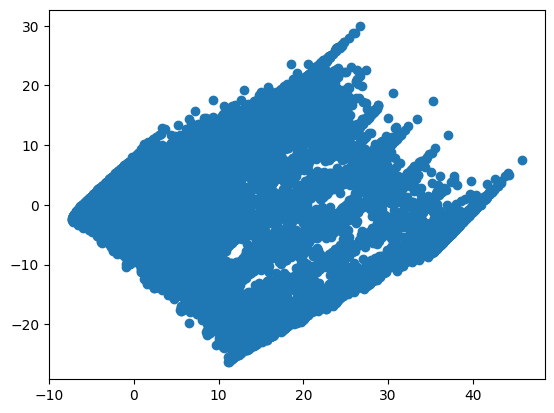

In [42]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

In [43]:
X_reconstructed = inverse_transform(X_transformed, Q, X_transformed.shape[1])

In [44]:
X_reconstructed.shape

(263537, 22)

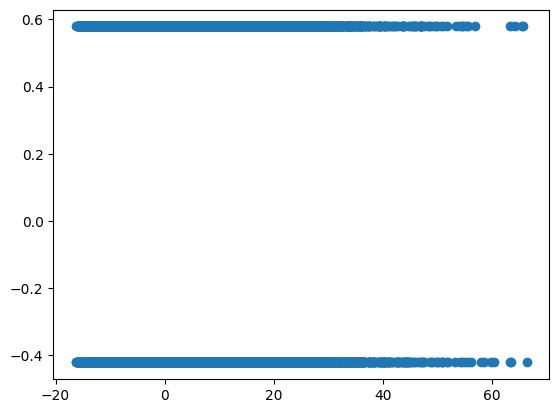

In [45]:
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1])

In [46]:
k_values = range(1, 22)

# Initialize variables for tracking the best result
best_reconstruction_error = np.inf
best_Q_matrix = None
best_k = None

# Experiment with different numbers of retained components
for k in k_values:
    # Select the top 'k' normalized eigenvectors
    selected_eigenvectors_Q_matrix = normalized_eigenvectors[:, :k]
    F_prime = np.dot(selected_eigenvectors_Q_matrix.T, X_centered.T).T

    # Compute the inverse of Q (Q^-1)
    Q_inverse = selected_eigenvectors_Q_matrix  # Because Q^-1 = Q^T for an orthogonal matrix

    reconstructed_F = np.dot(Q_inverse, F_prime.T) + np.mean(X_centered, axis=1, keepdims=True).T
    reconstructed_F = reconstructed_F.T
    # Compute the reconstruction error
    reconstruction_error = np.linalg.norm(X_centered - reconstructed_F, 'fro')

    # Update the best result if needed
    if reconstruction_error < best_reconstruction_error:
        best_reconstruction_error = reconstruction_error
        best_Q_matrix = selected_eigenvectors_Q_matrix
        best_k = k
        print(f'k:{k}, reconstruction_error:{reconstruction_error}')

# Report the best Q matrix, best k, and reconstruction error
print("Best Q matrix (for the best k={0}):".format(best_k))
#print(best_Q_matrix)

print("\nReconstruction Error with the Best Q matrix:")
print(best_reconstruction_error)

k:1, reconstruction_error:5171.140169320456
k:2, reconstruction_error:3851.412746798677
k:3, reconstruction_error:2308.611777113898
k:4, reconstruction_error:1923.5927702101785
k:5, reconstruction_error:1791.2125090562213
k:6, reconstruction_error:1736.5802827362927
k:7, reconstruction_error:1719.8655318843814
k:8, reconstruction_error:1703.042944996668
k:9, reconstruction_error:1687.3689996619407
k:10, reconstruction_error:1675.5345851187014
k:11, reconstruction_error:1668.87317932625
k:12, reconstruction_error:1661.0364994440392
k:13, reconstruction_error:1653.9016022819326
k:14, reconstruction_error:1647.5453534548242
k:15, reconstruction_error:1641.8546929837023
k:16, reconstruction_error:1637.5834078500345
k:17, reconstruction_error:1636.2238697734745
k:18, reconstruction_error:1634.2681275209698
k:19, reconstruction_error:1631.3938146059215
k:20, reconstruction_error:1628.2264719273062
k:21, reconstruction_error:1625.2091870391152
Best Q matrix (for the best k=21):

Reconstructio

In [47]:
best_Q_matrix.shape

(22, 21)

In [48]:
# Specify the number of components to retain
k = 21  # Set the desired number of components here

# Select the top 'k' normalized eigenvectors
selected_eigenvectors_Q_matrix = normalized_eigenvectors[:, :k]

# Step 3: Compute the transformed matrix Q^T * F_c
F_prime = np.dot(selected_eigenvectors_Q_matrix.T, X_centered.T).T

# F_prime now contains the transformed data

In [49]:
F_prime.shape

(263537, 21)

In [50]:
Q_inverse = selected_eigenvectors_Q_matrix  # Because Q^-1 = Q^T for an orthogonal matrix

# Step 2: Reconstruct the original matrix F
reconstructed_F = np.dot(Q_inverse, F_prime.T) + np.mean(X_centered, axis=1, keepdims=True).T
reconstructed_F = reconstructed_F.T
# reconstructed_F now contains the reconstructed original matrix

In [51]:
Q_inverse.shape

(22, 21)

In [52]:
reconstructed_F.shape

(263537, 22)

# Report
- Input Data is 22 features and 319,795 samples
- The Output of covariance matrix is 22x22 features (We used two different methods to compute the covariance matrix, and we obtained the same results)
- eigenvalues are 22 eigenvalues and eigenvectors are 22x22 features (We used the built-in method and from scratch method to compute the eigenvalues and eigenvectors, and we obtained the same results)
- We created the matrix Q by sorting the normalized eigenvectors in descending order of eigenvalues.
- We tried different numbers of components (k), and the best result is 21. Because the reconstruction error is the lowest.
- Best reconstruction error 1625.209 (From 5171.140 to 1625.209)
- We transformed the original matrix [ F' = Q (F - m)] to the transformed matrix and reconstructed the transformed matrix (inverse) [F = (Q - 1 * F') + m].
- We truncated matrix Q (take some values) from Q, then the new F length is smaller than old (Reduce dimensionality).
- The code iterates over different numbers of retained components (k_values) and reconstructs the data using the selected principal components. The reconstruction error is computed for each iteration.
- Best Results The best results are reported based on the minimum reconstruction error. The optimal number of retained components (best_k), the corresponding Q matrix (best_Q_matrix), and the minimum reconstruction error are printed.
- This report provides insights into the analysis, including the sorted eigenvalues and eigenvectors, the normalization of eigenvectors, and the determination of the best reconstruction using PCA. The output will show the best Q matrix, the optimal number of retained components, and the associated reconstruction error.
---
Team Member: 
- Mohamed Hisham `20200483`
- Abdelrahman Amin `20200311`
- Abdelrahman Mostafa `20200827`
- Yossef Mohamed `20200669`
- Esraa Abdelmoneam `20201015`